In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datos/top_consultas.csv')

In [3]:
top_consultas = pd.read_csv('./datos/top_consultas.csv')
top_series = top_consultas.serie_id.unique()

In [4]:
# Leer el archivo CSV que contiene los valores de las series de tiempo en otro DataFrame\n,
series_tiempo_valores = pd.read_csv('./datos/series-tiempo-valores.csv')
series_tiempo_valores_top = series_tiempo_valores.loc[series_tiempo_valores.serie_id.isin(top_series)] # Filtrar los IDs de las series principales\n,
series_tiempo_valores_top['indice_tiempo'] = pd.to_datetime(series_tiempo_valores_top['indice_tiempo']) # Convertir la columna 'indice_tiempo' al tipo de dato 'datetime'\n,
series_tiempo_valores_top.set_index('indice_tiempo', inplace=True)
numeric_df = series_tiempo_valores_top.select_dtypes(include=[np.number]) # Seleccionar las columnas numéricas del DataFrame filtrado\n,

# Agrupar el DataFrame numérico por 'serie_id' y muestrear con frecuencia mensual, agregando los valores promedio\n,
grouped_df = numeric_df.groupby(series_tiempo_valores_top.serie_id).resample('M').mean()

# Restablecer el índice para convertir los datos agrupados en un DataFrame\n,
grouped_df = grouped_df.reset_index()

/tmp/ipykernel_377890/1645082270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_tiempo_valores_top['indice_tiempo'] = pd.to_datetime(series_tiempo_valores_top['indice_tiempo']) # Convertir la columna 'indice_tiempo' al tipo de dato 'datetime'\n,


## Inicio y fin de las series

In [5]:
# Group by serie_id and aggregate the earliest and latest dates
date_table = grouped_df.groupby('serie_id').agg({'indice_tiempo': ['min', 'max']})

# Reset column names
date_table.columns = ['earliest_date', 'latest_date']

# # Format the dates to yyyy-mm
# date_table['earliest_date'] = date_table['earliest_date'].dt.strftime('%Y-%m')
# date_table['latest_date'] = date_table['latest_date'].dt.strftime('%Y-%m')

# Print the resulting table
display(date_table)

,earliest_date,latest_date
serie_id,,
101.1_I2NG_2016_M_22,2016-04-30,2024-04-30
103.1_I2N_2016_M_15,2016-04-30,2024-04-30
103.1_I2N_2016_M_19,2016-04-30,2024-04-30
11.3_VMASD_2004_M_23,2004-01-31,2024-03-31
11.3_VMATC_2004_M_12,2004-01-31,2024-03-31
116.4_TCRZE_2015_D_36_4,1997-01-31,2024-04-30
131.1_FET_0_0_12,1971-01-31,2024-03-31
143.3_ICE_SER_VM_2004_A_34,2004-02-29,2024-03-31
143.3_NO_PR_2004_A_21,2004-01-31,2024-03-31


<Axes: >

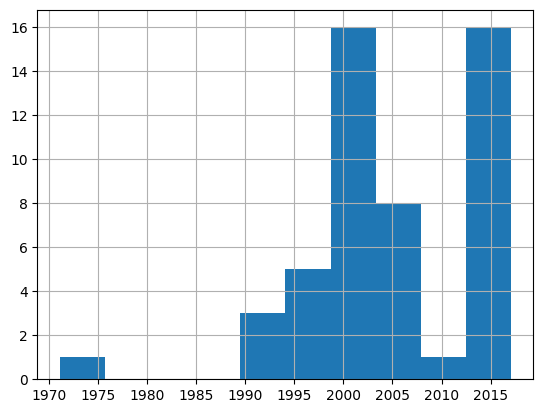

In [6]:
date_table.earliest_date.hist()

## Correlaciones

In [7]:
data = grouped_df.loc[grouped_df.indice_tiempo > '2000']


In [8]:
CS = data.set_index(['indice_tiempo', 'serie_id'])['valor'].unstack()
CS.corr().round(2)

serie_id,101.1_I2NG_2016_M_22,103.1_I2N_2016_M_15,103.1_I2N_2016_M_19,11.3_VMASD_2004_M_23,11.3_VMATC_2004_M_12,116.4_TCRZE_2015_D_36_4,131.1_FET_0_0_12,143.3_ICE_SER_VM_2004_A_34,143.3_NO_PR_2004_A_21,143.3_NO_PR_2004_A_31,...,74.3_IET_0_M_16,74.3_ISC_0_M_19,89.1_IR_BCRA1_M_0_M_26,89.1_TIPF35D_0_0_35,89.2_TS_INTEALL_0_D_18,89.2_TS_INTELAR_0_D_20,89.2_TS_INTE_PM_0_D_16,92.1_RID_0_0_32,92.1_TCV_0_0_21,94.2_UVAD_D_0_0_10
serie_id,,,,,,,,,,,,,,,,,,,,,
101.1_I2NG_2016_M_22,1.00,1.00,1.00,-0.11,-0.02,-0.01,0.74,-0.07,-0.03,0.06,...,0.20,0.05,0.70,0.76,0.67,0.76,0.69,-0.57,0.99,1.00
103.1_I2N_2016_M_15,1.00,1.00,1.00,-0.11,-0.02,-0.00,0.74,-0.07,-0.03,0.06,...,0.19,0.05,0.70,0.77,0.68,0.76,0.69,-0.58,0.99,0.99
103.1_I2N_2016_M_19,1.00,1.00,1.00,-0.11,-0.02,-0.01,0.74,-0.07,-0.03,0.06,...,0.20,0.05,0.70,0.76,0.67,0.76,0.69,-0.57,0.99,1.00
11.3_VMASD_2004_M_23,-0.11,-0.11,-0.11,1.00,0.75,-0.48,-0.26,0.07,0.74,0.68,...,0.71,-0.27,0.38,0.03,0.03,0.04,-0.01,0.30,-0.13,-0.08
11.3_VMATC_2004_M_12,-0.02,-0.02,-0.02,0.75,1.00,-0.52,-0.09,0.07,0.72,0.83,...,0.62,-0.42,0.57,0.25,0.28,0.26,0.16,0.44,0.01,0.00
116.4_TCRZE_2015_D_36_4,-0.01,-0.00,-0.01,-0.48,-0.52,1.00,0.04,0.12,-0.75,-0.83,...,-0.22,0.55,-0.72,-0.22,-0.48,-0.46,0.17,-0.31,-0.22,-0.03
131.1_FET_0_0_12,0.74,0.74,0.74,-0.26,-0.09,0.04,1.00,0.02,-0.25,-0.27,...,-0.36,-0.09,-0.39,0.22,0.38,0.38,0.89,-0.20,0.42,0.76
143.3_ICE_SER_VM_2004_A_34,-0.07,-0.07,-0.07,0.07,0.07,0.12,0.02,1.00,-0.03,-0.03,...,-0.01,0.05,-0.27,-0.12,-0.13,-0.12,-0.10,-0.04,-0.09,-0.06
143.3_NO_PR_2004_A_21,-0.03,-0.03,-0.03,0.74,0.72,-0.75,-0.25,-0.03,1.00,0.88,...,0.74,-0.32,0.71,0.38,0.41,0.38,0.05,0.46,0.14,-0.02


In [9]:
# !pip install fastdtw

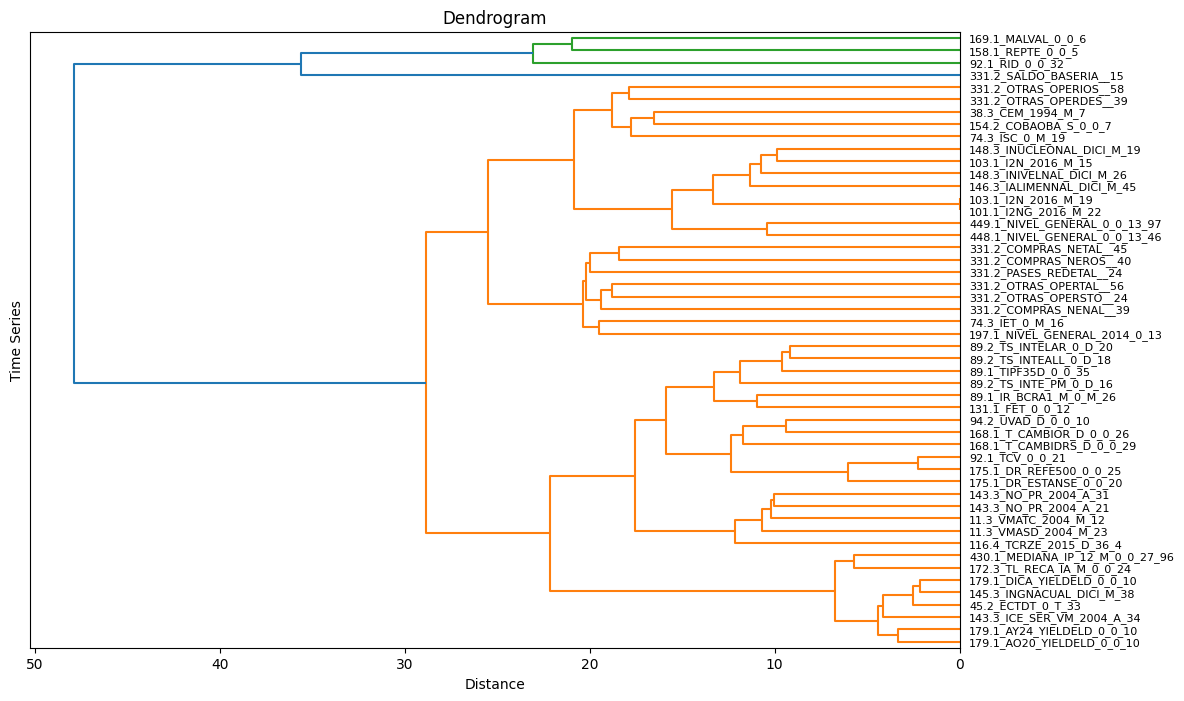

In [10]:
import numpy as np
import fastdtw
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming CS is your DataFrame with time series data

# Calculate the distance matrix using DTW
distance_matrix = np.zeros((len(CS.columns), len(CS.columns)))
for i, series1 in enumerate(CS.columns):
    for j, series2 in enumerate(CS.columns):
        distance_matrix[i, j], _ = fastdtw.fastdtw(CS[series1].dropna().values, CS[series2].dropna().values)

# Apply a logarithmic transformation to the distance matrix
log_distance_matrix = np.log(distance_matrix + 1)

# Perform hierarchical clustering on the log-transformed distance matrix
linkage = sch.linkage(log_distance_matrix, method='average')

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage, labels=CS.columns, orientation='left')

# Customize the dendrogram plot
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Time Series')
plt.yticks(fontsize=8)

# Show the plot
plt.show()


In [11]:
# CS['331.2_SALDO_BASERIA__15'].plot()

# Get the order of the columns from the dendrogram
column_order = dendrogram['ivl']

# Reorder the columns in the CS DataFrame
CS = CS.reindex(columns=column_order)

In [12]:
df

,serie_id,consultas_total,consultas_30_dias,consultas_90_dias,consultas_180_dias,serie_titulo,serie_descripcion,serie_valor_ultimo,serie_valor_anterior,serie_unidades
0,116.4_TCRZE_2015_D_36_4,2078629,104820,108527,426377,tipo_cambio_real_multilateral_actual,Índice de Tipo de Cambio Real Multilateral,1.176596e+02,1.180152e+02,Índice 17-Dic-2015=100
1,103.1_I2N_2016_M_15,1253830,42190,44411,162759,ipc_2016_nucleo,IPC-GBA. Núcleo. Base abr 2016. Mensual,4.503191e+02,4.296765e+02,Índice Dic-2016=100
2,145.3_INGNACUAL_DICI_M_38,251582,13080,12221,43268,ipc_ng_nacional_tasa_variacion_mensual,IPC. Tasa de variación mensual. Nivel General....,4.080294e-02,4.810807e-02,Variación intermensual
3,89.2_TS_INTE_PM_0_D_16,290885,13380,13202,41563,tasas_interes_pm,Instrumentos del BCRA. Tasa de Política Moneta...,3.800000e+01,3.800000e+01,Porcentaje (0-100)
4,168.1_T_CAMBIOR_D_0_0_26,330653,10396,12502,38379,tipo_cambio_bna_vendedor,Tipo de Cambio BNA (Vendedor),9.450000e+01,9.450000e+01,Pesos argentinos por dólar
5,74.3_ISC_0_M_19,270137,13144,13949,34684,ica_saldo_comercial,Saldo comercial. En millones de dólares.,1.062000e+03,1.068000e+03,Millones de dólares
6,45.2_ECTDT_0_T_33,207026,15720,4890,25999,eph_continua_tasa_desempleo_total,Tasa de desempleo total. En porcentaje.,1.095793e-01,1.170000e-01,Porcentaje
7,154.2_COBAOBA_S_0_0_7,205492,9648,9794,25785,asalariados_priv_sin_estac_cordoba,Asalariados. Sector privado. Sin Estacionalida...,4.732000e+02,4.726660e+02,Miles de personas
8,169.1_MALVAL_0_0_6,206582,9585,9595,25744,merval,Índice Merval del IAMC,4.843227e+04,4.892068e+04,Índice
9,172.3_TL_RECA_IA_M_0_0_24,205429,15574,4779,25659,total_recaudacion_var_ia,Total recaudación. Variación interanual,7.218095e-01,5.191979e-01,Variación interanual


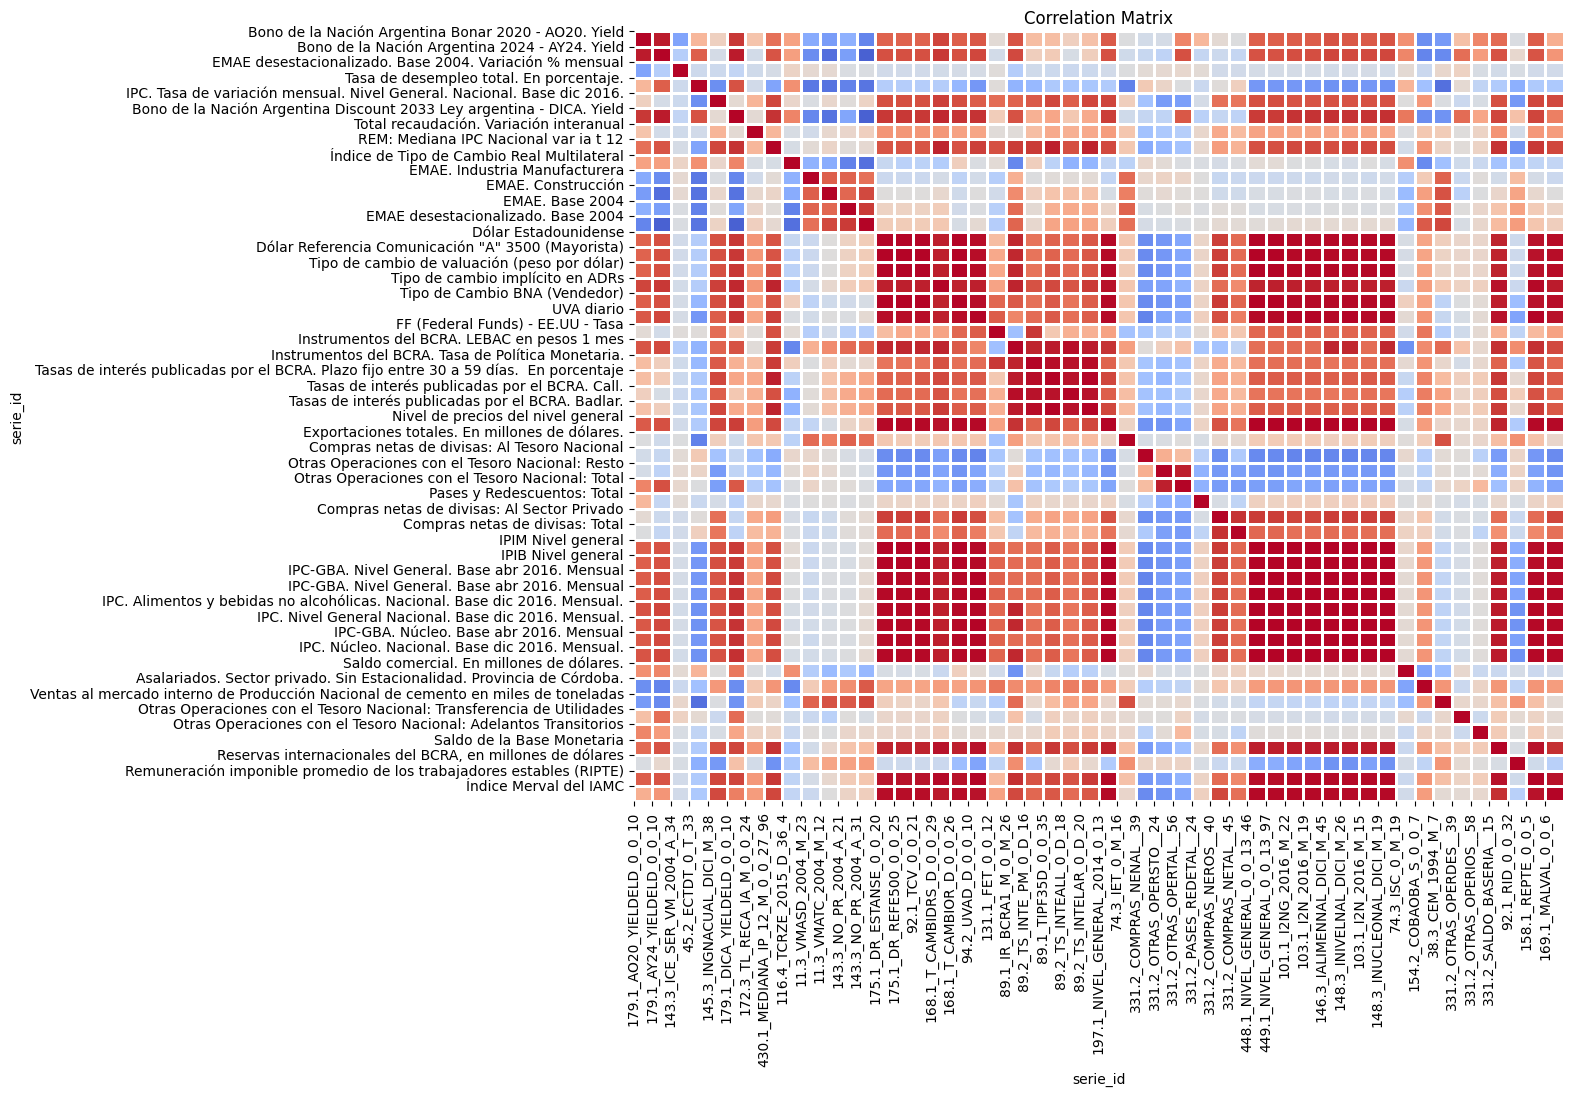

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming CS is your correlation matrix DataFrame

# Create the correlation matrix
corr_matrix = CS.corr().round(2)

# Get the unique serie_descripcion values
# serie_descriptions = df.serie_descripcion.unique()
serie_descriptions = df.set_index('serie_id').loc[column_order].serie_descripcion.values

# Create the heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, linecolor='white', cbar=False)
plt.title('Correlation Matrix')
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(serie_descriptions)), labels=serie_descriptions, rotation=0)
plt.show()


In [14]:
plots_data = data.merge(df[['serie_id', 'serie_descripcion']])
plots_data.head()


,serie_id,indice_tiempo,dataset_id,distribucion_id,valor,serie_descripcion
0,101.1_I2NG_2016_M_22,2016-04-30,101.0,101.1,85.5254,IPC-GBA. Nivel General. Base abr 2016. Mensual
1,101.1_I2NG_2016_M_22,2016-05-31,101.0,101.1,89.1118,IPC-GBA. Nivel General. Base abr 2016. Mensual
2,101.1_I2NG_2016_M_22,2016-06-30,101.0,101.1,91.8528,IPC-GBA. Nivel General. Base abr 2016. Mensual
3,101.1_I2NG_2016_M_22,2016-07-31,101.0,101.1,93.7328,IPC-GBA. Nivel General. Base abr 2016. Mensual
4,101.1_I2NG_2016_M_22,2016-08-31,101.0,101.1,93.9221,IPC-GBA. Nivel General. Base abr 2016. Mensual


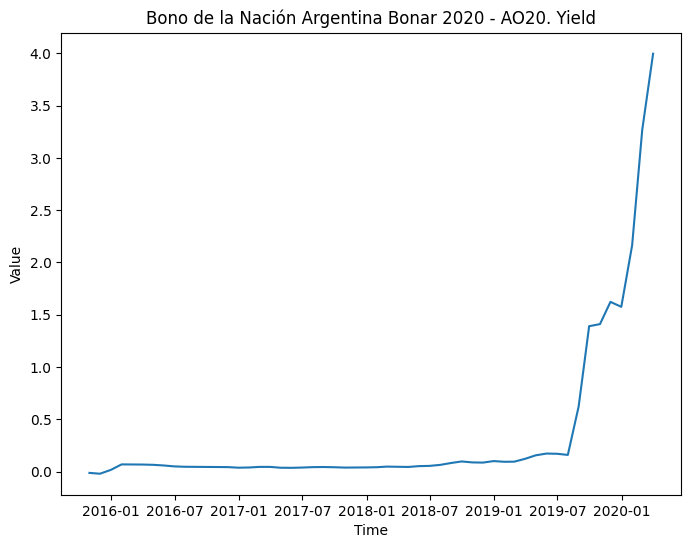

### Bono de la Nación Argentina Bonar 2020 - AO20. Yield


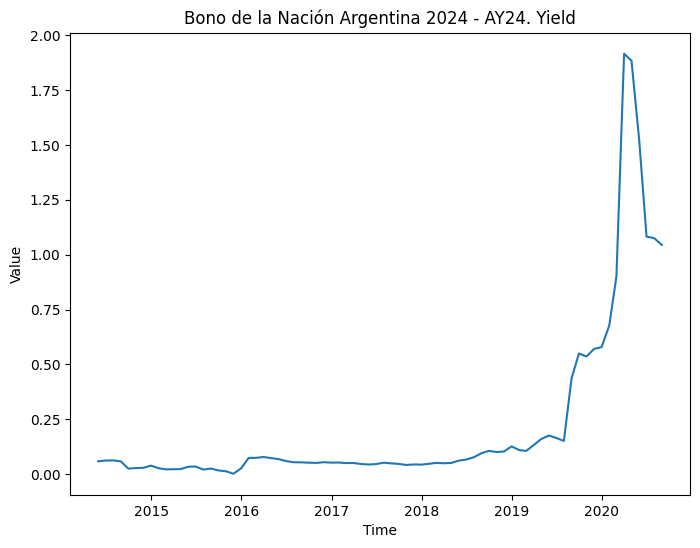

### Bono de la Nación Argentina 2024 - AY24. Yield


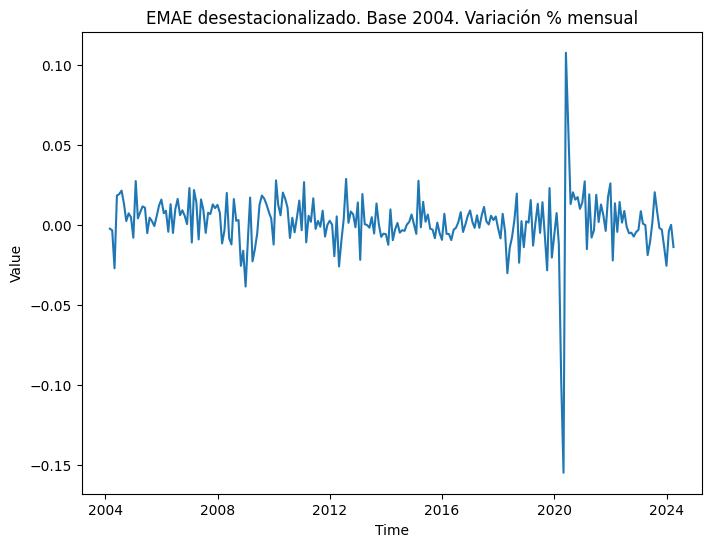

### EMAE desestacionalizado. Base 2004. Variación % mensual


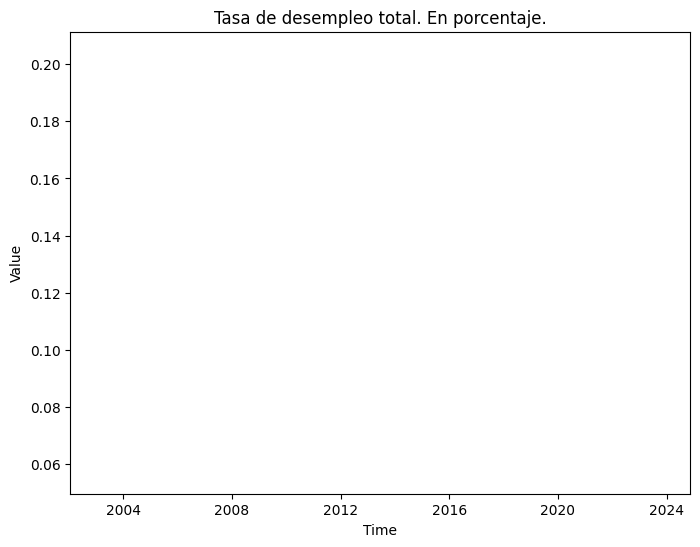

### Tasa de desempleo total. En porcentaje.


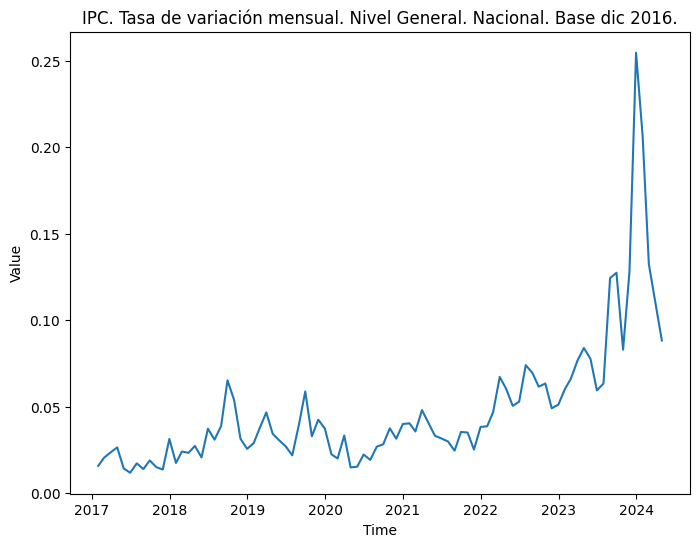

### IPC. Tasa de variación mensual. Nivel General. Nacional. Base dic 2016.


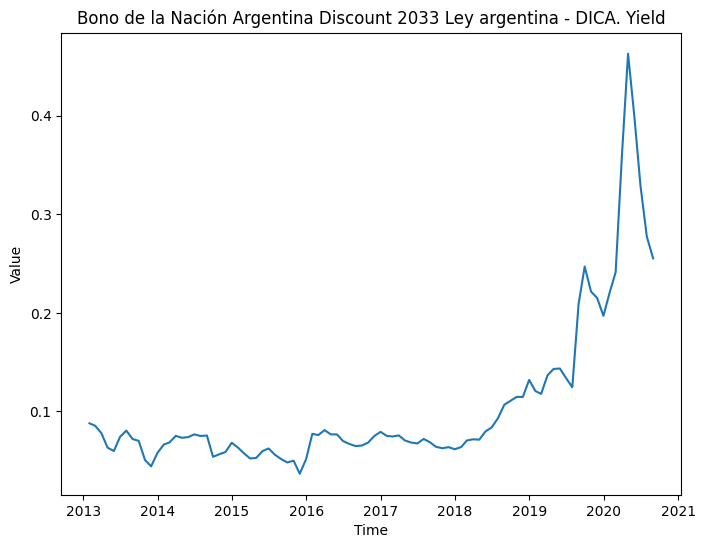

### Bono de la Nación Argentina Discount 2033 Ley argentina - DICA. Yield


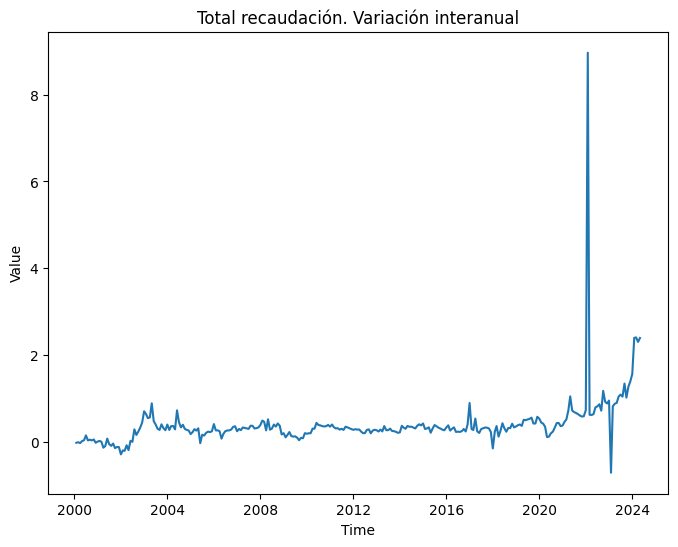

### Total recaudación. Variación interanual


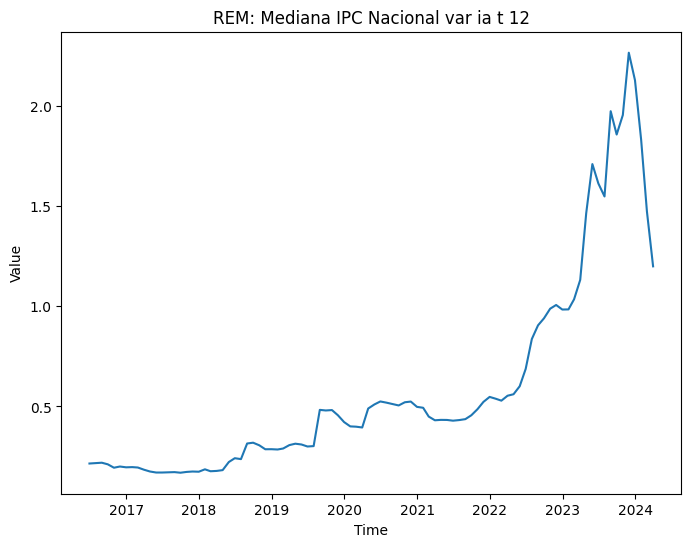

### REM: Mediana IPC Nacional var ia t 12


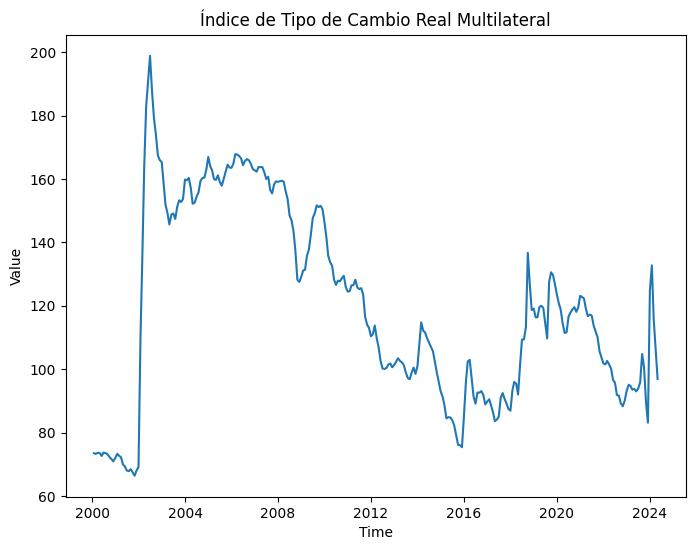

### Índice de Tipo de Cambio Real Multilateral


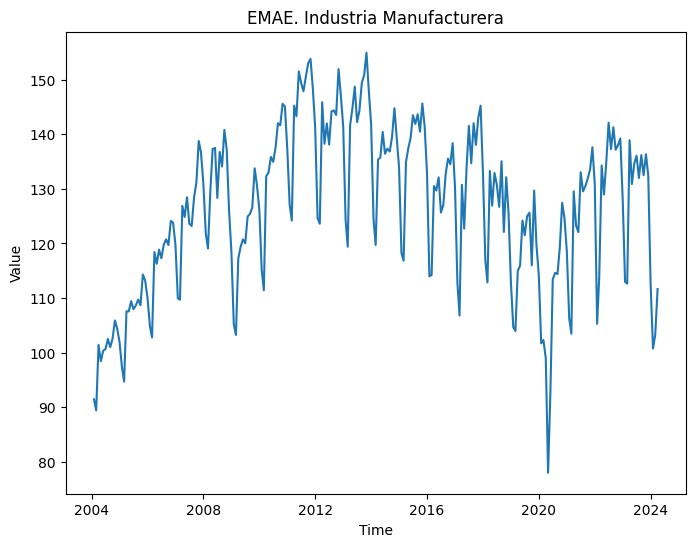

### EMAE. Industria Manufacturera


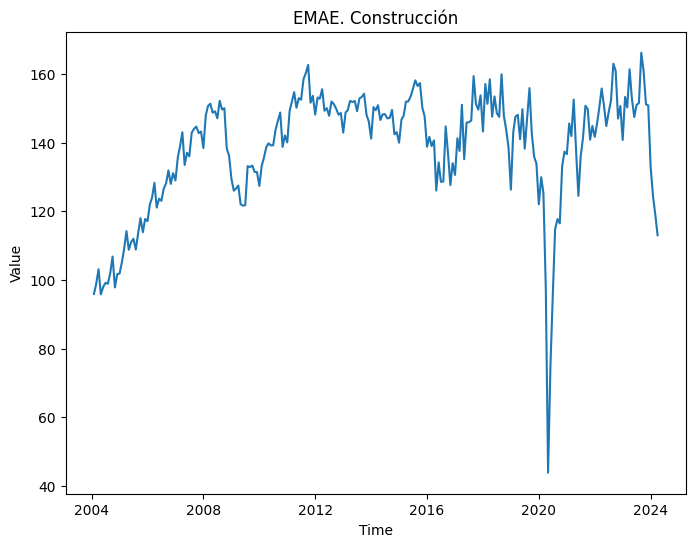

### EMAE. Construcción


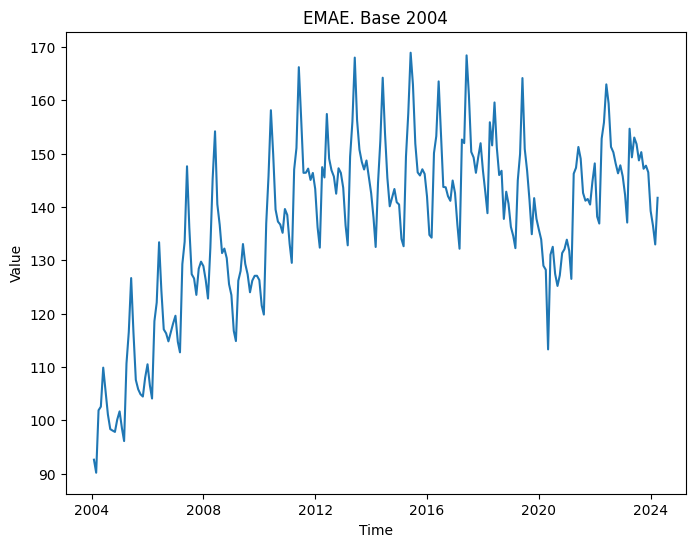

### EMAE. Base 2004


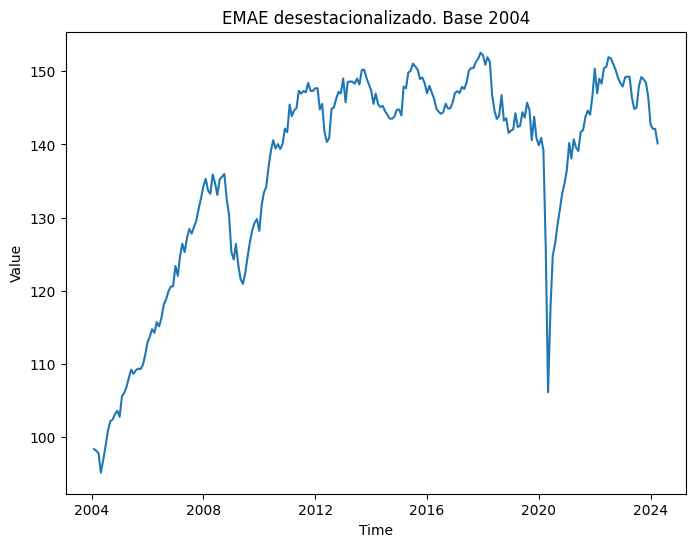

### EMAE desestacionalizado. Base 2004


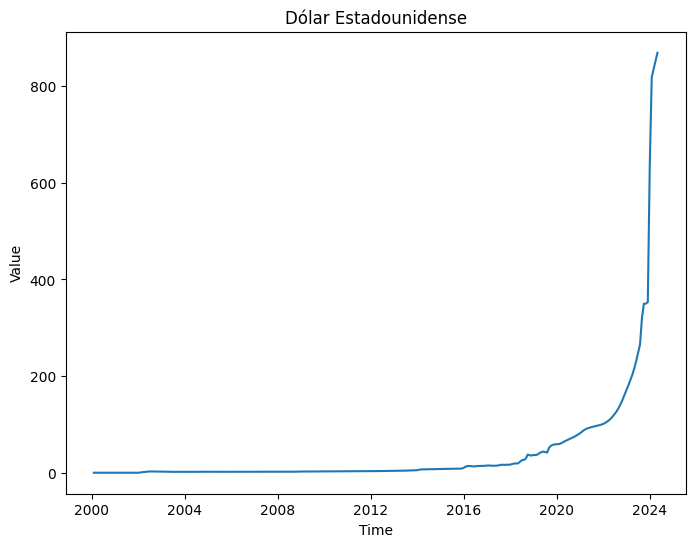

### Dólar Estadounidense


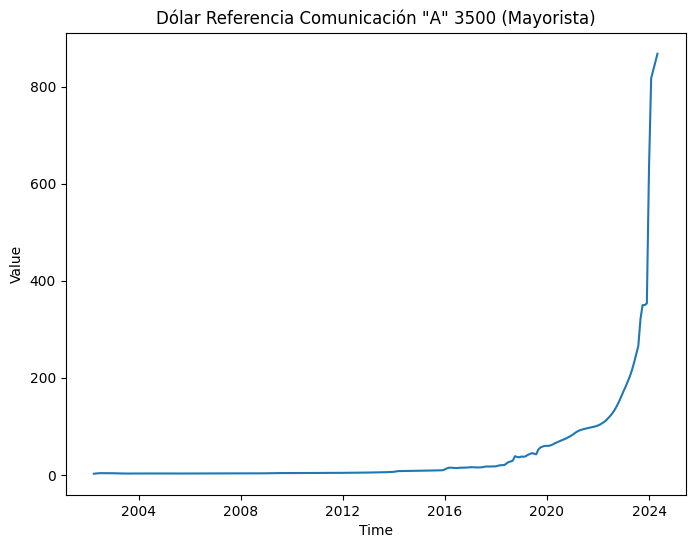

### Dólar Referencia Comunicación "A" 3500 (Mayorista)


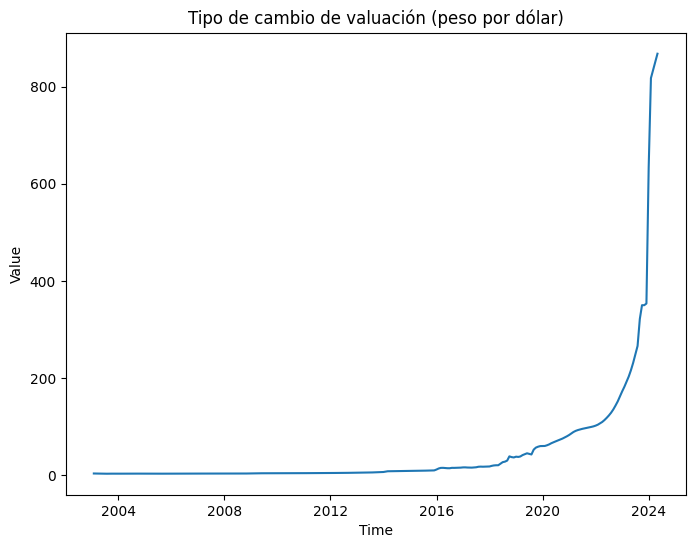

### Tipo de cambio de valuación (peso por dólar)


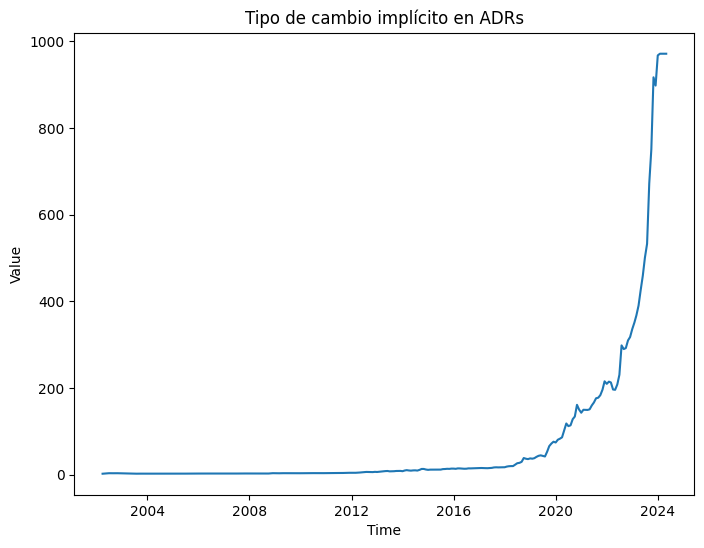

### Tipo de cambio implícito en ADRs


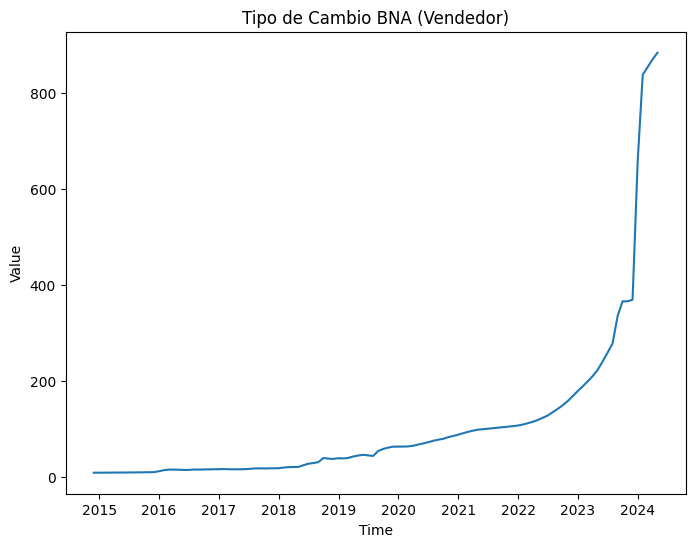

### Tipo de Cambio BNA (Vendedor)


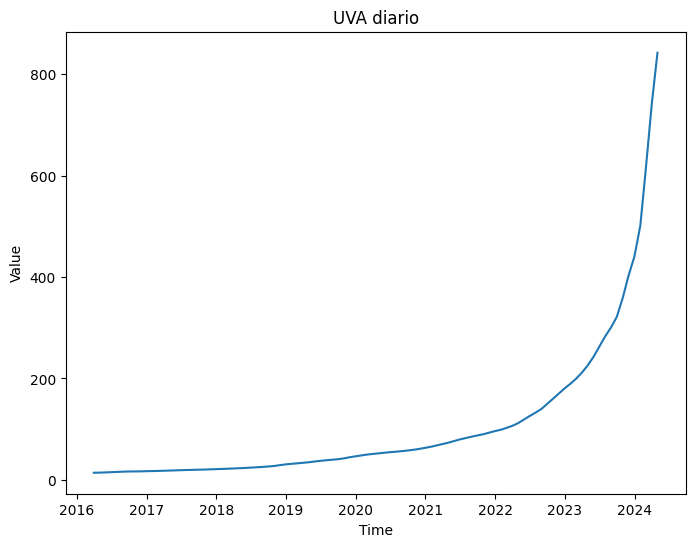

### UVA diario


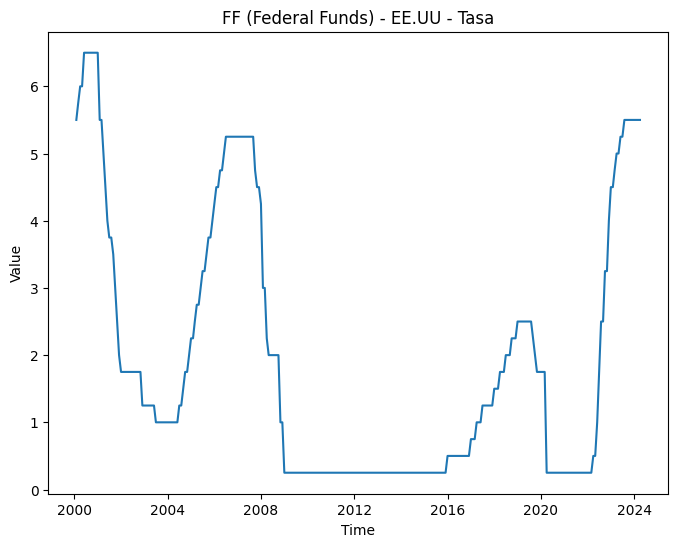

### FF (Federal Funds) - EE.UU - Tasa


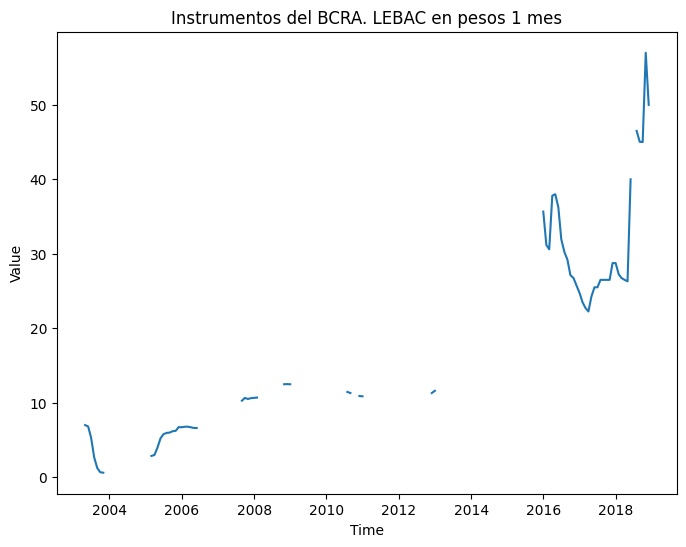

### Instrumentos del BCRA. LEBAC en pesos 1 mes


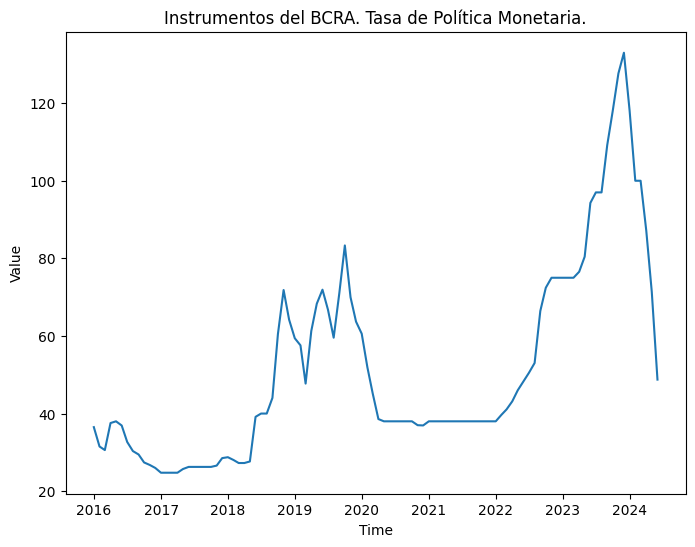

### Instrumentos del BCRA. Tasa de Política Monetaria.


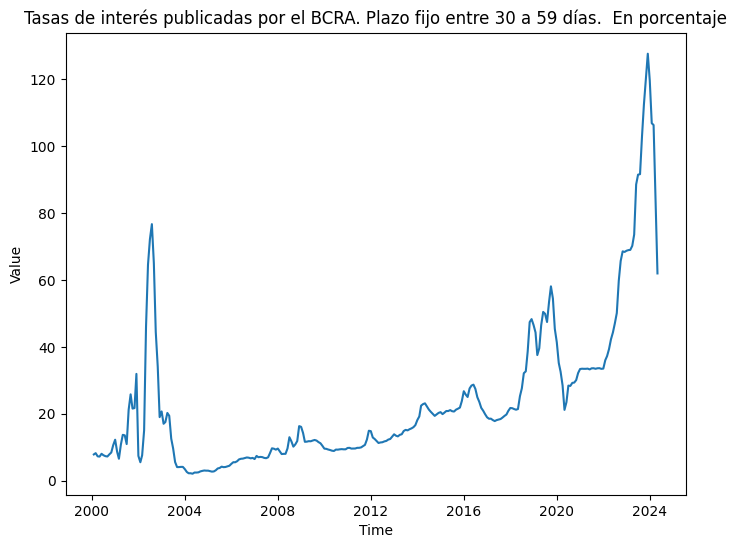

### Tasas de interés publicadas por el BCRA. Plazo fijo entre 30 a 59 días.  En porcentaje


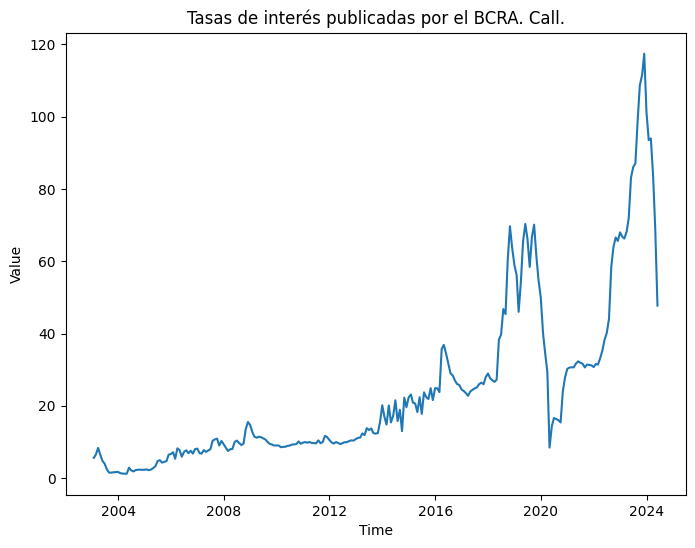

### Tasas de interés publicadas por el BCRA. Call.


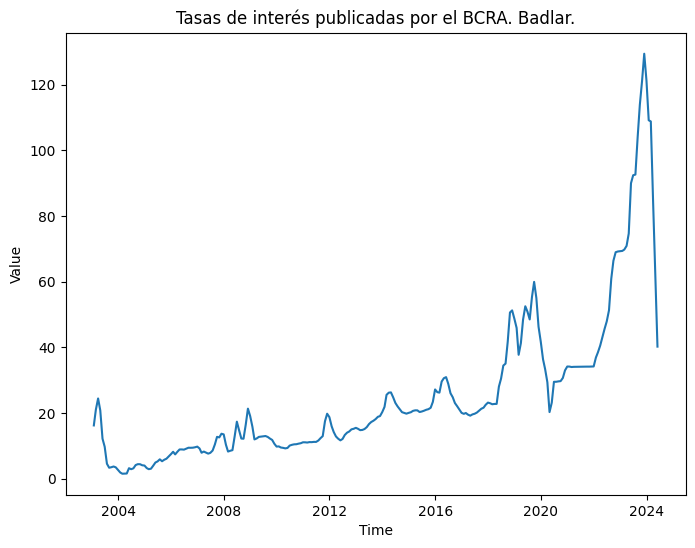

### Tasas de interés publicadas por el BCRA. Badlar.


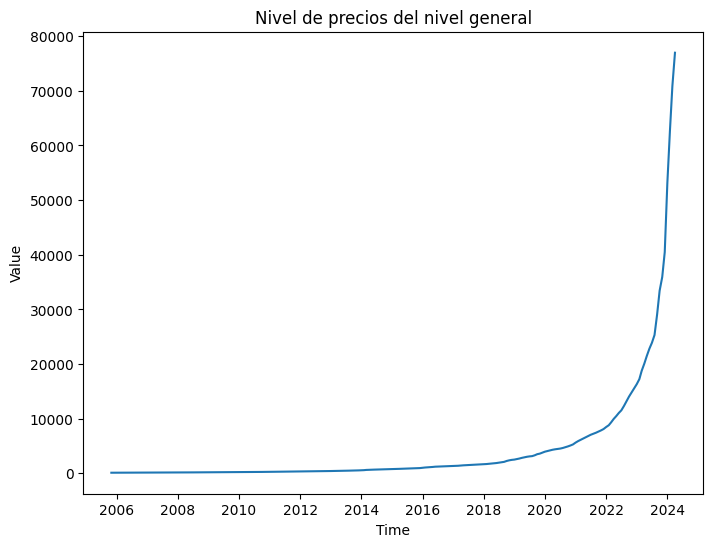

### Nivel de precios del nivel general


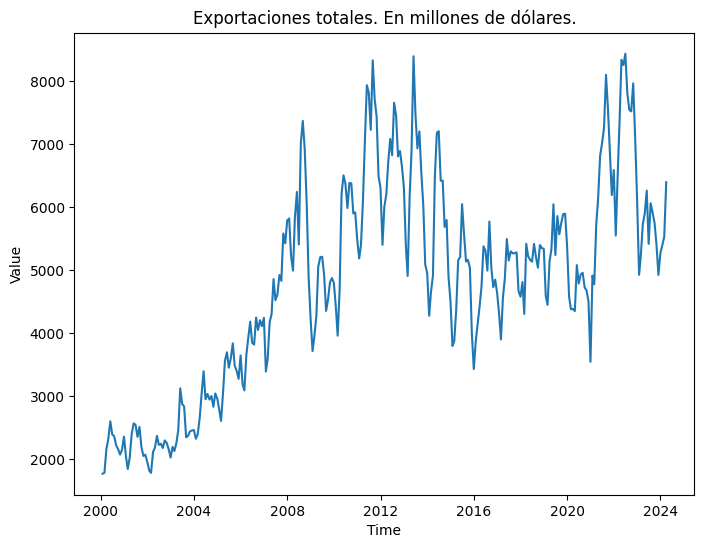

### Exportaciones totales. En millones de dólares.


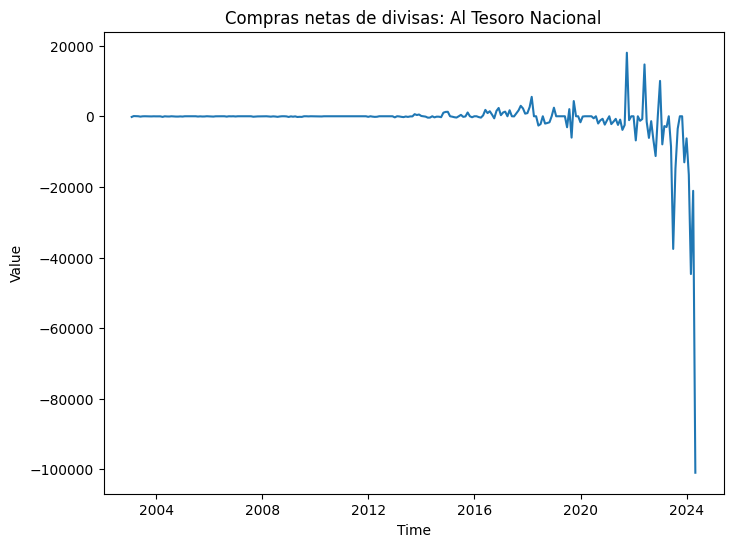

### Compras netas de divisas: Al Tesoro Nacional


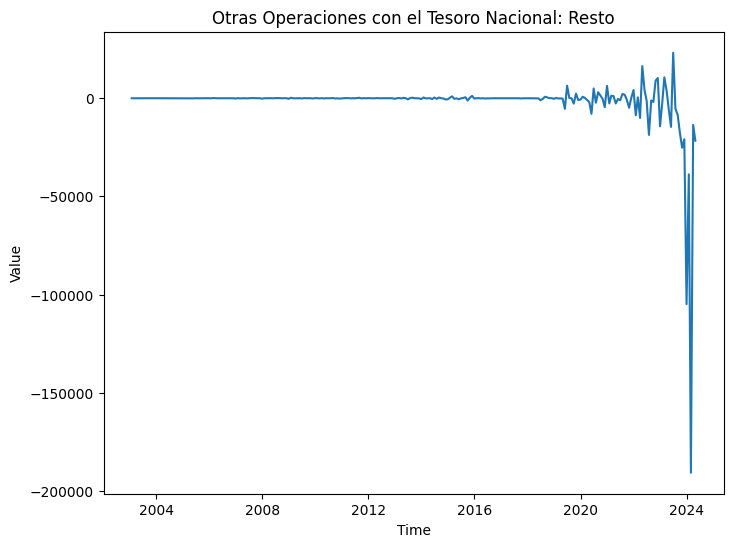

### Otras Operaciones con el Tesoro Nacional: Resto


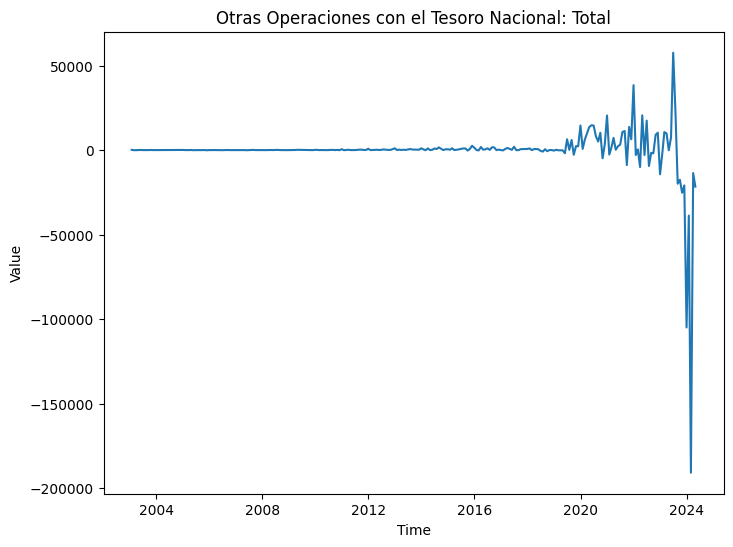

### Otras Operaciones con el Tesoro Nacional: Total


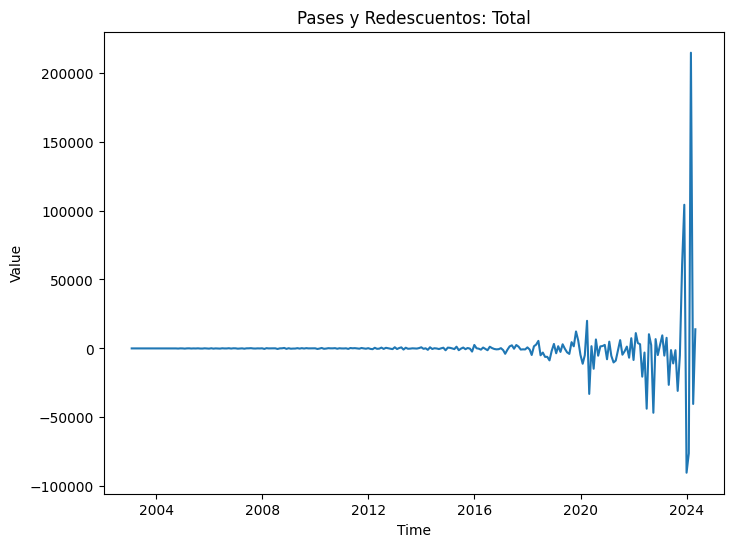

### Pases y Redescuentos: Total


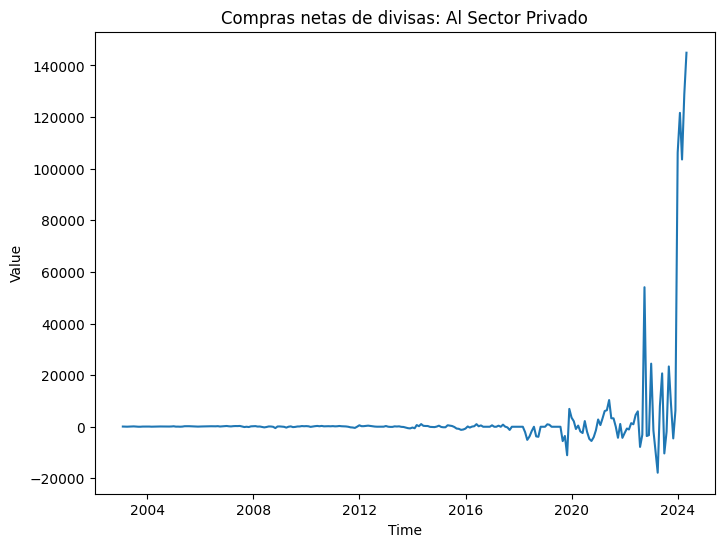

### Compras netas de divisas: Al Sector Privado


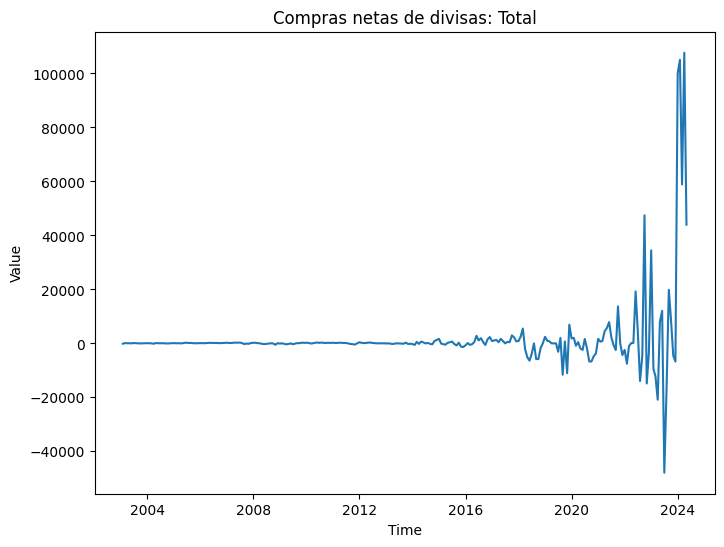

### Compras netas de divisas: Total


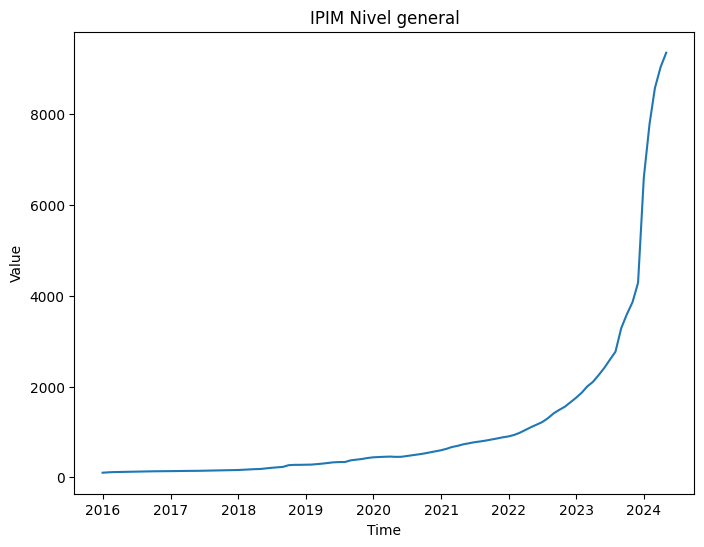

### IPIM Nivel general


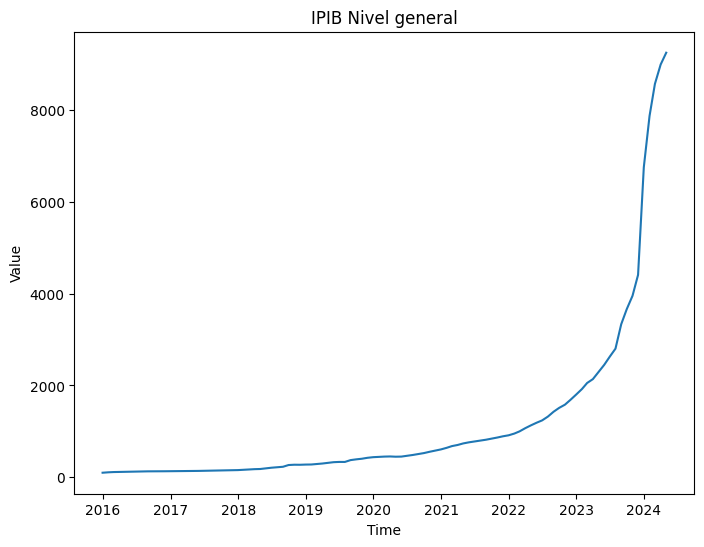

### IPIB Nivel general


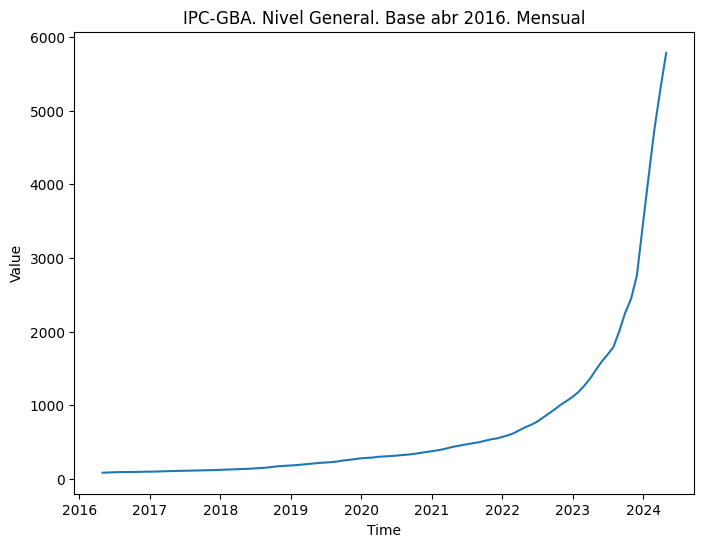

### IPC-GBA. Nivel General. Base abr 2016. Mensual


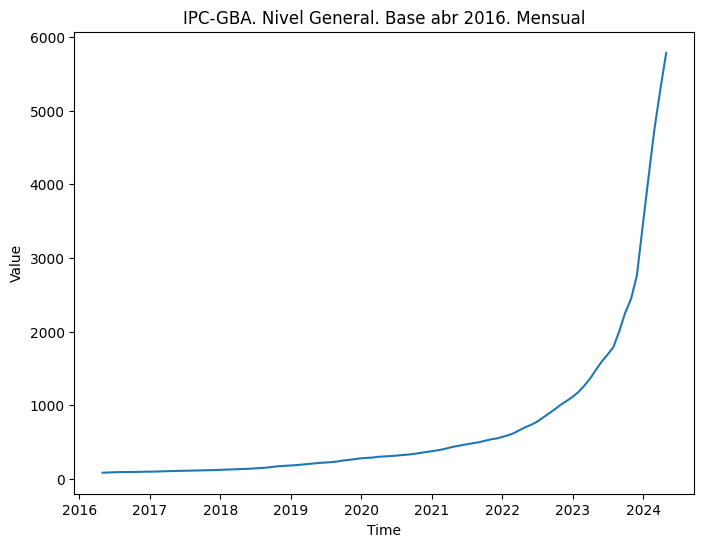

### IPC-GBA. Nivel General. Base abr 2016. Mensual


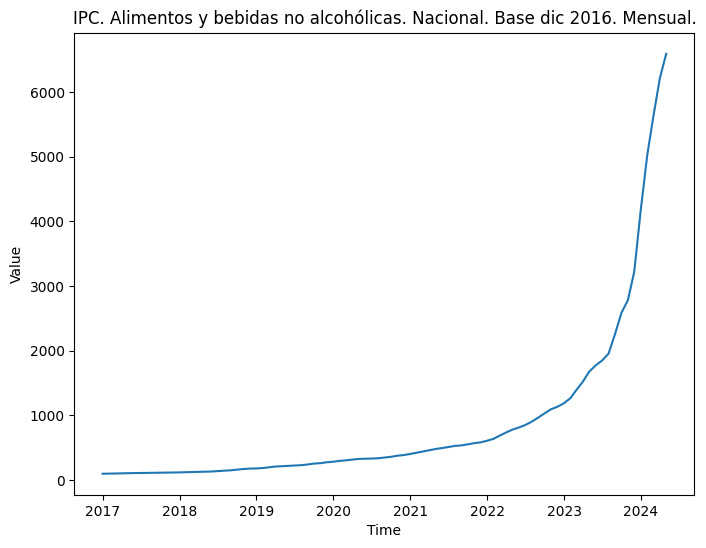

### IPC. Alimentos y bebidas no alcohólicas. Nacional. Base dic 2016. Mensual.


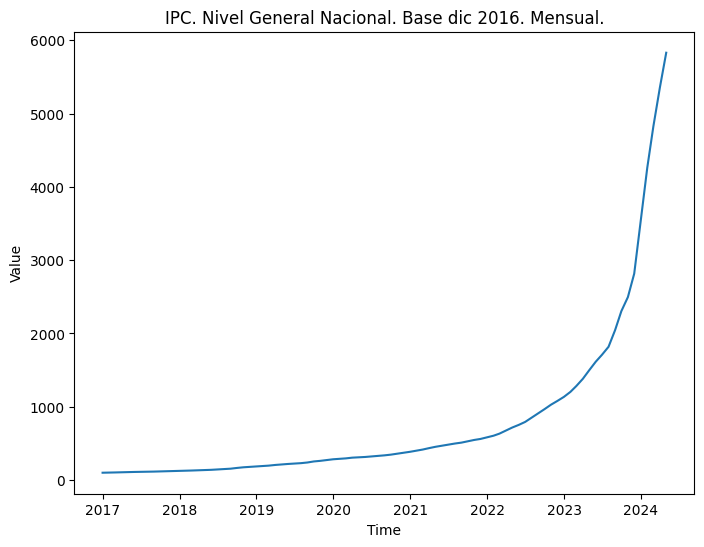

### IPC. Nivel General Nacional. Base dic 2016. Mensual.


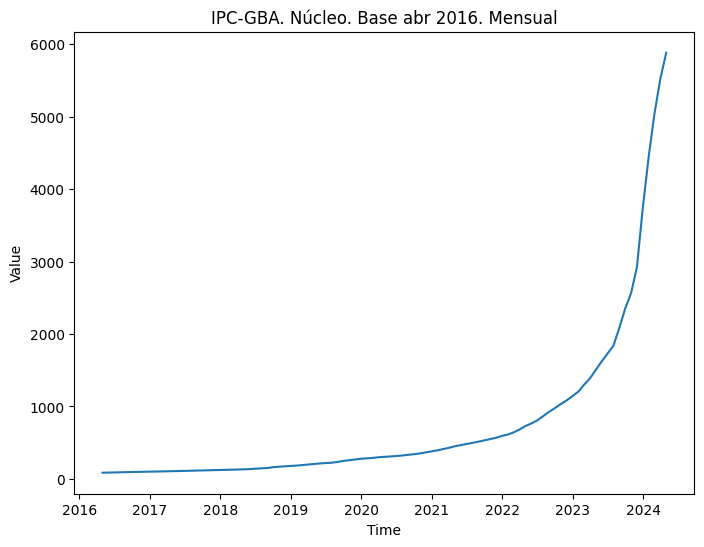

### IPC-GBA. Núcleo. Base abr 2016. Mensual


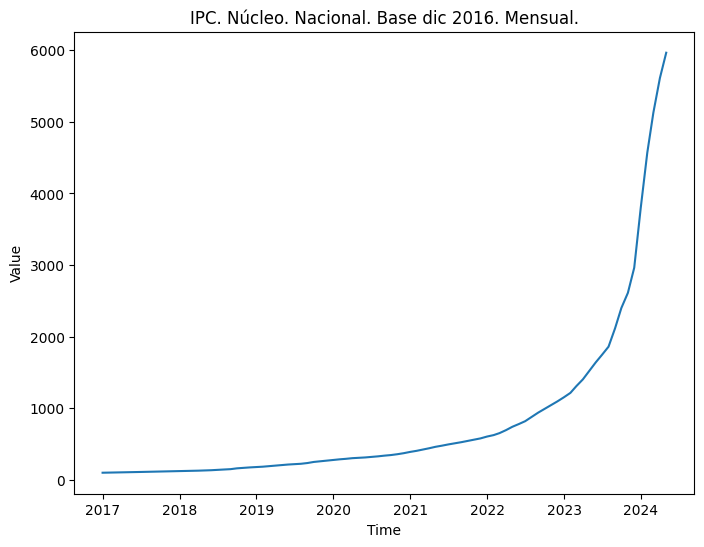

### IPC. Núcleo. Nacional. Base dic 2016. Mensual.


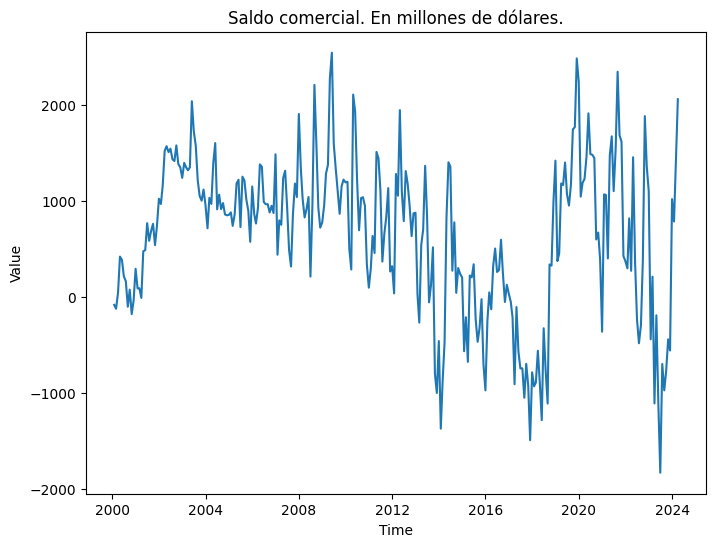

### Saldo comercial. En millones de dólares.


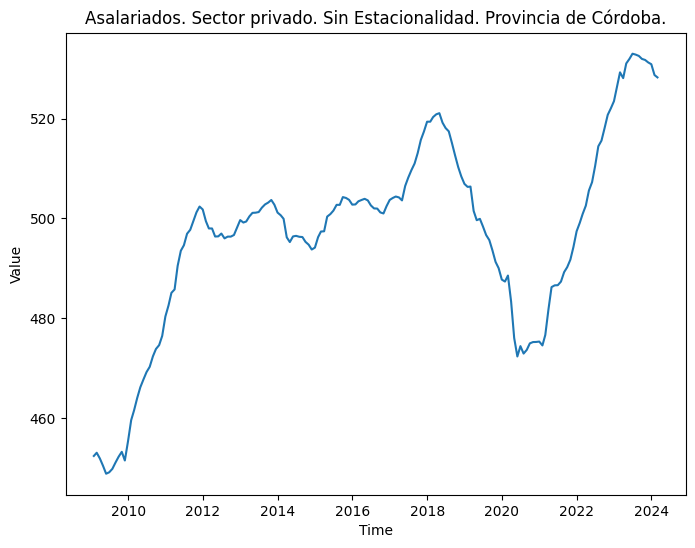

### Asalariados. Sector privado. Sin Estacionalidad. Provincia de Córdoba.


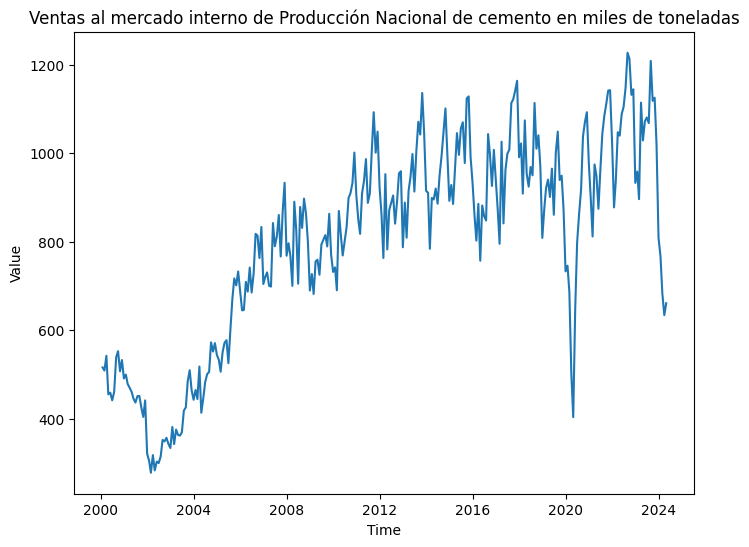

### Ventas al mercado interno de Producción Nacional de cemento en miles de toneladas


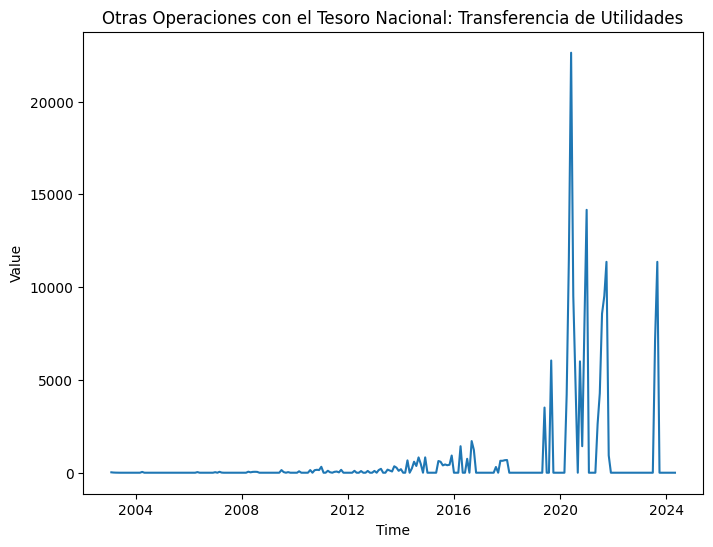

### Otras Operaciones con el Tesoro Nacional: Transferencia de Utilidades


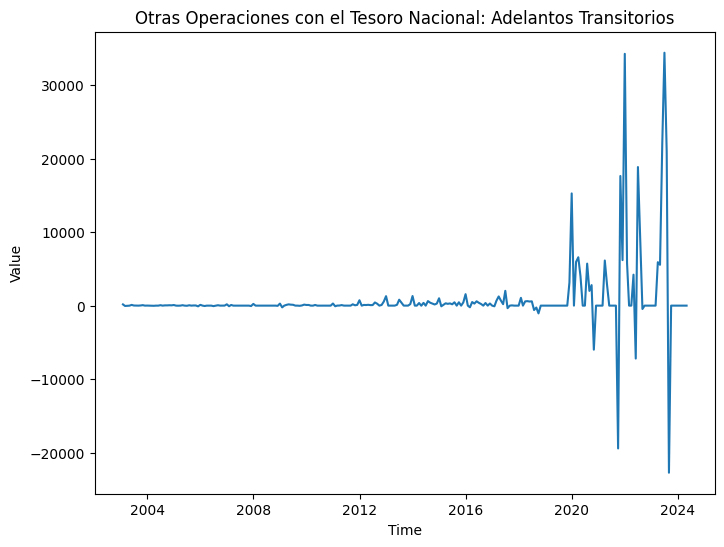

### Otras Operaciones con el Tesoro Nacional: Adelantos Transitorios


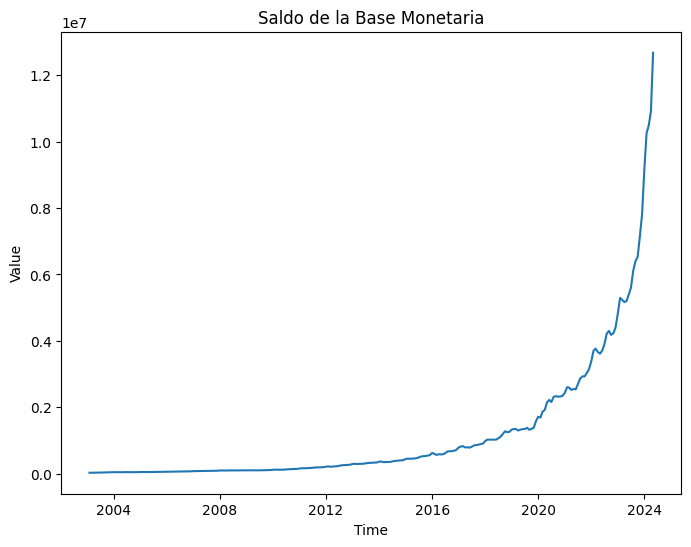

### Saldo de la Base Monetaria


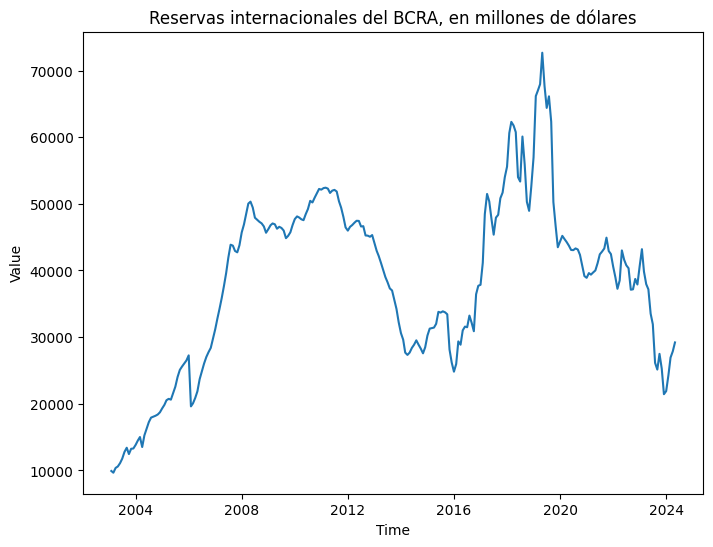

### Reservas internacionales del BCRA, en millones de dólares


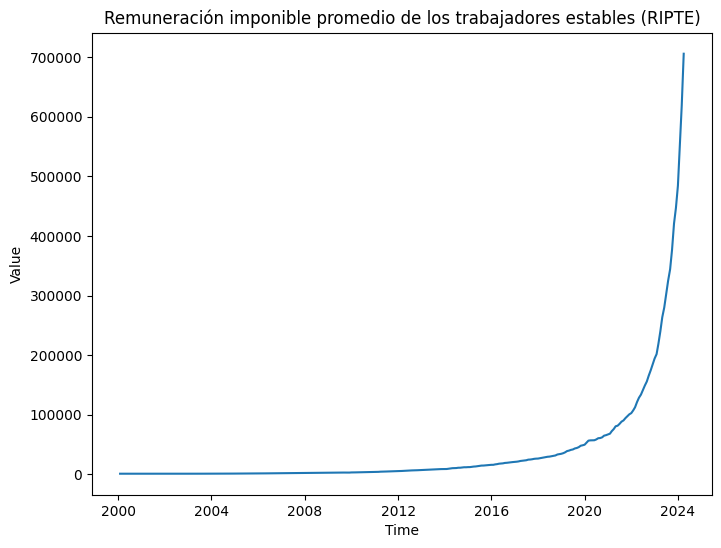

### Remuneración imponible promedio de los trabajadores estables (RIPTE)


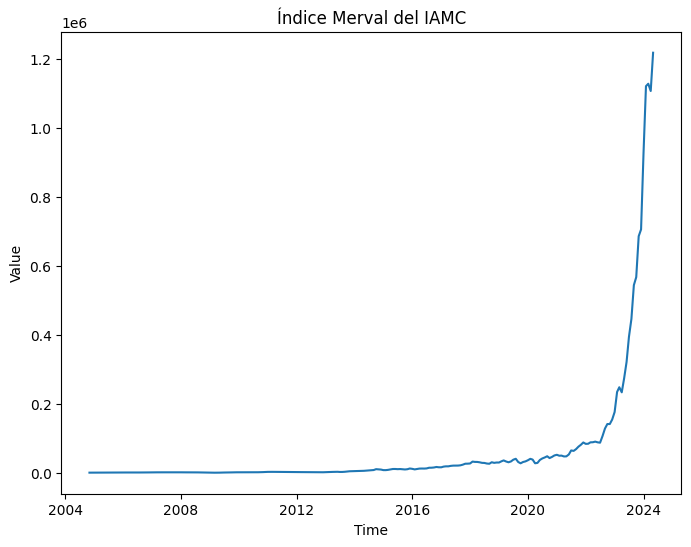

### Índice Merval del IAMC


In [15]:
import matplotlib.pyplot as plt

# Assuming CS is your DataFrame with time series data
# Assuming plots_data is your DataFrame with merged data

# Iterate over the columns in CS
for column in CS.columns:
    # Get the corresponding description
    description = plots_data.loc[plots_data['serie_id'] == column, 'serie_descripcion'].iloc[0]
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(CS[column])
    plt.title(description)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()
    
    # Print the Markdown heading
    print(f"### {description}")
